**MACHINE LEARNING FOR NATURAL LANGUAGE PROCESSING. ENSAE 2021**


*SENTIMENT ANALYSIS OF AMAZON ALEXA REVIEW*


KABA Cheick Mohamed & KAMLA FOTSING ENSAE 3A

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

**Data importation and exploration**

In [ ]:
data=pd.read_csv('amazon_alexa.tsv', sep='\t')

In [ ]:
print(data.shape)
data.head()

(3150, 5)


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


Le dataset contient 3150 observations et 5 colonnes.

Une colonne correspondante à la note attribué au produit: *rating* comprise entre 0 et 5

La colonne pour la date : *date*

La colonne correspondant au type de produit: *variation*

La colonnne du commentaire: *verified_reviews*

La colonne sur le sentiment dégagé: *feedback*  prenant 0 si le sentiment est négatif et 1 s'il est positif


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

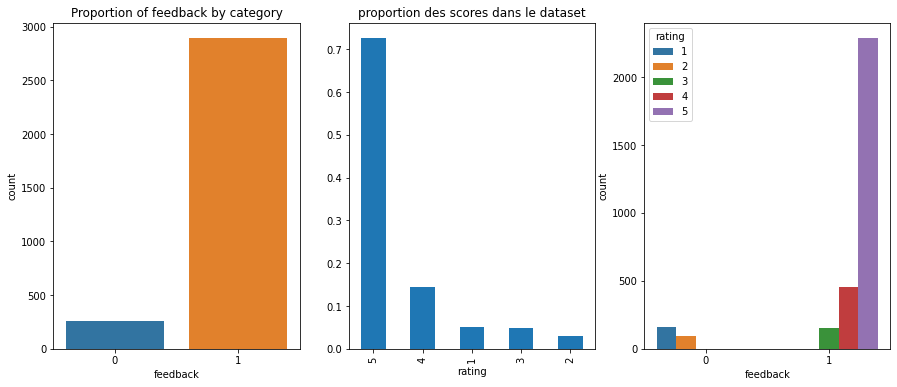

In [ ]:
import seaborn as sns
plt.gcf().subplots_adjust(wspace = 0.5, hspace = 1)
fig = plt.figure(figsize=(15,4))
for a in range(1, 4):
    if a==1:
        ax=fig.add_subplot(1,3,a)
        data['feedback'].value_counts(normalize=True).plot.bar(color=['#1f77b4', '#ff7f0e'])
        plt.xlabel('feedback')
        plt.title('Proportion of feedback by category(a)')
    elif a==2:
        ax=fig.add_subplot(1,3,a)
        data['rating'].value_counts(normalize=True).plot.bar()
        plt.title('proportion des scores dans le dataset(b)')
        plt.xlabel('rating')
    else:
        ax=fig.add_subplot(1,3,a)
        sns.countplot(x='rating', hue='feedback', data=data)
        plt.title('distribution of feedback by rating(c)')

On remarque que le dataset est fortement déséquilibré. Environ seulement 8% des reviews sont considérées comme négatives.

**REVIEW LENGTH AND WORDS FREQUENCY**

In [ ]:
data['length'] = data['verified_reviews'].apply(len)

In [ ]:
data[data['length']<=1]

,rating,date,variation,verified_reviews,feedback,length
60,5,30-Jul-18,Heather Gray Fabric,😍,1,1
85,5,30-Jul-18,Heather Gray Fabric,,1,1
183,3,29-Jul-18,Heather Gray Fabric,,1,1
219,5,29-Jul-18,Sandstone Fabric,,1,1
374,1,26-Jul-18,Black,,0,1
...,...,...,...,...,...,...
3114,3,30-Jul-18,Black Dot,,1,1
3120,5,30-Jul-18,Black Dot,,1,1
3123,4,30-Jul-18,Black Dot,,1,1
3126,5,30-Jul-18,Black Dot,,1,1


We observe that some reviews don't have any text. We will drop these lines from our dataset.

In [ ]:
data = data[data['length'] > 1]

We use CountVectorizer to analyse word frquency in our dataset.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english') 
words_count = cv.fit_transform(data.verified_reviews)
sum_words_count = words_count.sum(axis=0)

In [ ]:
words_count.shape

(3069, 3784)

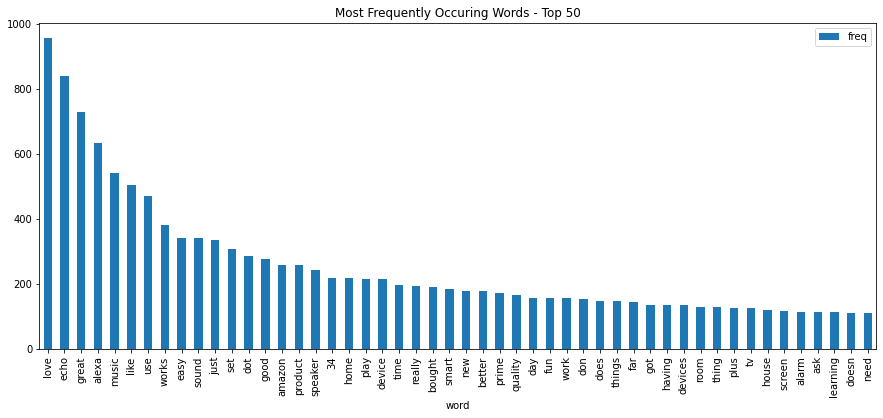

In [ ]:
words_freq = [(word, sum_words_count[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
#Finally we sort a list of tuples that contain the word and their occurrence in the corpus.

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(50).plot(x='word', y='freq', kind='bar', figsize=(15, 6))
plt.title("Most Frequently Occuring Words - Top 50")
plt.show()


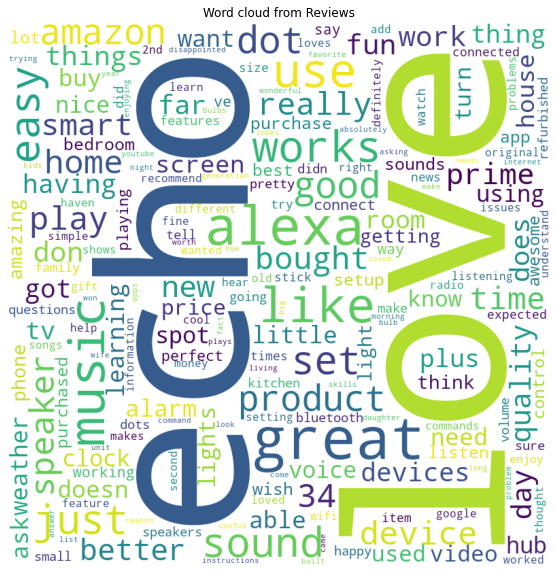

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
wordcloud = WordCloud(background_color = 'white', width = 800, height = 800, stopwords=stopwords).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Word cloud from Reviews")
plt.show()



Les 

**DATA PREPROCESSING: 1- Train and test**

We start by splitting our data in train and test.

Then we augment train that in order to balance the dataset.

In [ ]:
#Split in train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.verified_reviews, data.feedback, test_size=0.3, random_state=42)

In [ ]:
!pip install nlpaug
!pip install transformers

In [ ]:
import nlpaug.augmenter.word as naw
aug_context = naw.ContextualWordEmbsAug(model_path='bert-base-cased', action="insert") 

In [ ]:
!pip install tqdm
from tqdm import tqdm

def augment_text(data ,samples=800, aug_pr=0.3, c=0):
  
    aug_context.aug_p = aug_pr
    new_reviews=[]
    data_neg =data[data.feedback==c].reset_index(drop=True)
 
    ## data augmentation loop
    for i in tqdm(np.random.randint(0, len(data_neg), samples)):
        review = data_neg.iloc[i]['verified_reviews']
        review_aug = aug_context.augment(review)
        new_reviews.append(review_aug)
    
    data_neg_aug =pd.DataFrame({'verified_reviews':new_reviews,'feedback':c})
    return data_neg_aug 

!!! WARNING: The following cell takes about one hour to run if you want to save time you can directly import the dataframe we save using: `pd.read_csv('augmented_review_data.csv')`

In [ ]:
df = augment_text(data)

100%|██████████| 800/800 [1:37:07<00:00,  7.28s/it]


In [ ]:
df.to_csv('augmented_review_data.csv')

In [ ]:
from sklearn.utils import shuffle
train_data = shuffle(pd.DataFrame({'verified_reviews':X_train, 'feedback':y_train}).append(df).reset_index(drop=True))

In [ ]:
train_data.reset_index(drop=True, inplace=True)

In [ ]:
X_train_aug = train_data.verified_reviews
y_train_aug = train_data.feedback

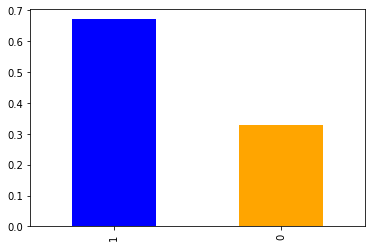

In [ ]:
train_data['feedback'].value_counts(normalize=True).plot.bar(color=['blue', 'orange'])

**DATA PREPROCESSING : 2- Cleaning and tokenizing**

The cleaning process consists in removing all non-informational word in the corpus. Then We use part of speech tagging and WordNetLemmatizer to tokenize.

In [ ]:
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet
def clean_corpus(reviewCorpus):

    def get_wordnet_pos(pos_tag):
        '''
        returns the type of word giving the tag
        
        Args:
          postag(string): tag obtained from POS tagging.
        
        Returns:
          type of word (string)
        '''
        if pos_tag.startswith('J'):
            return wordnet.ADJ
        elif pos_tag.startswith('V'):
            return wordnet.VERB
        elif pos_tag.startswith('N'):
            return wordnet.NOUN
        elif pos_tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN
        
    import string
    from nltk import pos_tag
    from nltk.corpus import stopwords
    from nltk.tokenize import WhitespaceTokenizer
    from nltk.stem import WordNetLemmatizer

    def clean_tokenize_review(review):
        '''
        returns cleaning and tokenized text giving a specfic review

        Args:
          review(string): the brut text of the review
        
        Returns:
          type of word (string)
        '''
        
        # lower text
        text = review.lower()
        # tokenize text and remove puncutation
        text = [word.strip(string.punctuation) for word in text.split(" ")]
        # remove words that contain numbers
        text = [word for word in text if not any(c.isdigit() for c in word)]
        # remove stop words
        stop = stopwords.words('english')
        text = [x for x in text if x not in stop]
        # remove empty tokens
        text = [t for t in text if len(t) > 0]
        # pos tag text
        pos_tags = pos_tag(text)
        # lemmatize text
        text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
        # remove words with only one letter
        text = [t for t in text if len(t) > 1]
        return text

    return reviewCorpus.apply(lambda x: clean_tokenize_review(x))

**DATA PREPROCESSING : 3- Embedding with Word2vec**

We will transform each review tokenize in a sequence of vectors thanks to  Word2vec.

In [ ]:
data['verified_reviews_cleaned'] = clean_corpus(data["verified_reviews"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data['length_review'] = data['verified_reviews_cleaned'].apply(len)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


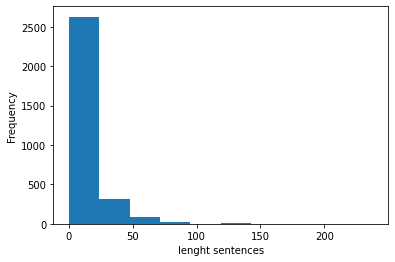

In [ ]:
data['length_review'].plot.hist()
plt.title('')
plt.xlabel('lenght sentences')
plt.show()

This graph shows that in our corpus the number of tokens obtained for each review is mainly between 1 and 25. We choose to put 30 as size for each review sequence. We also fix the length of each token vector to 100. Rather than using a pre-trained model of Word2vec we choose to fit it on our corpus.

In [ ]:
reviews_token_list = clean_corpus(X_train)

In [ ]:
reviews_token_list[:3]

2144    [new, device, still, learn, work, great, navig...
233     [super, impress, alexa, prime, lapse, play, an...
2626    [love, watch, wife, argue, alexa, wake, one, n...
Name: verified_reviews, dtype: object

In [ ]:
#Word2vec training
from gensim.models import Word2Vec
import multiprocessing

cores = multiprocessing.cpu_count()

w2v_model = Word2Vec(reviews_token_list, size=100,  min_count=1, workers=cores, sg=0)
w2v_model.train(reviews_token_list, total_examples=len(data), epochs=100)
data_wv = w2v_model.wv

In [ ]:
def tokens_vectors(reviewTokenCorpus, trained_word2vec=data_wv, dim=100, max_length = 30):
  '''
  transforms our list of list of tokens into a list of list of vec (3D array) 
  
  Args:
    tokenCorpus (list of list): corpus of tokens represented as a list of 
      tokenized texts in which each token is separated by a space.
  
  Returns:
    Numpy array representing the 3D array of token embeddings from the word2vec
    model pre-trained using Gensim
  '''
  new_sample = np.zeros((len(reviewTokenCorpus),  max_length, dim), dtype='float32')
  for j, sample in enumerate(reviewTokenCorpus):
    for i, token in enumerate(sample):
      try: new_sample[j, i, :] = trained_word2vec.get_vector(token)
      except: new_sample[j, i, :] = np.zeros(dim)

      if i >=max_length-1:
        break
  return new_sample

The processing part gives an output of a 3D array containing float values. Here is an example:

In [ ]:
X_train_lstm = tokens_vectors(clean_corpus(X_train_aug))
X_test_lstm = tokens_vectors(clean_corpus(X_test))

**MODEL TRAINING**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Model, optimizers
from tensorflow.keras.layers import Dense, Activation, Embedding,concatenate, Dropout, Input, LSTM, GRU, Reshape, Lambda, RepeatVector, TimeDistributed, Bidirectional


In [ ]:
def lstm_model(X_train, y_train, batch_size, nb_epoch, d_rate, f_active, nb_units, max_length, dim, lr, optimiz):
    lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=lr, decay_steps=10000,decay_rate=0.9)
    
    if optimiz=='SGD':
        opt = keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.6, nesterov=True)  #0.6
    elif optimiz=='RMSprop':
        opt = keras.optimizers.RMSprop(learning_rate=lr_schedule, momentum=0.9)
    elif optimiz=='Adagrad':
        opt = keras.optimizers.Adagrad(learning_rate=lr_schedule)
    elif optimiz == 'Adadelta':
        opt = keras.optimizers.Adadelta(learning_rate=lr_schedule)
    else:
        opt = keras.optimizers.Adam(learning_rate=lr_schedule, clipvalue=0.5)
    
    ##### End init model 
    
    path_checkpoint = "model_checkpoint.h5"
    es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)
    modelckpt_callback = keras.callbacks.ModelCheckpoint(monitor="val_loss",
                                                        filepath=path_checkpoint,
                                                        verbose=1,
                                                        save_weights_only=True,
                                                        save_best_only=True)

    dynamic_inputs = Input(shape=(max_length, dim))
    outputs = LSTM(units=nb_units['lstm1'], return_sequences=True,  activation=f_active['lstm1'])(dynamic_inputs)
    outputs = Dropout(d_rate['lstm1'])(outputs)
    outputs = LSTM(units=nb_units['lstm2'],  activation=f_active['lstm2'])(outputs)
    outputs = Dropout(d_rate['lstm2'])(outputs)
    outputs = Dense(units = nb_units['dense1'], activation=f_active['dense1'])(outputs)
    outputs = Dropout(d_rate['dense1'])(outputs)
    model_output = Dense(1, activation=f_active['dense_final'])(outputs)
    final_model = Model(inputs = dynamic_inputs, outputs = model_output)

    # Compile model
    final_model.compile(loss='binary_crossentropy', optimizer=opt, metrics='accuracy')


    history = final_model.fit(X_train, y_train, epochs=nb_epoch, 
                          batch_size=batch_size, validation_split=0.1,  
                          callbacks=[es_callback, modelckpt_callback], shuffle=True)
    
    return final_model

In [ ]:
tf.random.set_seed(20)
lr = 0.01
nb_units = {}
f_active = {}
d_rate = {}
nb_layers_dense = 1
max_length = 30
dim = 100
nb_units['lstm1'] = 32
nb_units['lstm2'] = 32
nb_units['dense1'] = 10
 
f_active['lstm1'] = 'relu'
f_active['lstm2'] = 'relu'
f_active['dense1'] = 'linear'
f_active['dense_final'] = 'sigmoid'
 
d_rate['lstm1']=0.2
d_rate['lstm2']=0.2
d_rate['dense1']=0.2

nb_epoch, batch_size = 30, 32
optimiz='SGD'

In [ ]:
model_lstm = lstm_model(X_train_lstm, y_train_aug, batch_size, nb_epoch, d_rate, f_active, nb_units, max_length, dim, lr, optimiz)

Epoch 1/30
83/83 [==============================] - 4s 26ms/step - loss: 0.6661 - accuracy: 0.6509 - val_loss: 0.5992 - val_accuracy: 0.6915

Epoch 00001: val_loss improved from inf to 0.59919, saving model to model_checkpoint.h5
Epoch 2/30
83/83 [==============================] - 2s 22ms/step - loss: 0.6173 - accuracy: 0.6671 - val_loss: 0.5708 - val_accuracy: 0.7119

Epoch 00002: val_loss improved from 0.59919 to 0.57082, saving model to model_checkpoint.h5
Epoch 3/30
83/83 [==============================] - 2s 22ms/step - loss: 0.5957 - accuracy: 0.6855 - val_loss: 0.5479 - val_accuracy: 0.7559

Epoch 00003: val_loss improved from 0.57082 to 0.54793, saving model to model_checkpoint.h5
Epoch 4/30
83/83 [==============================] - 2s 21ms/step - loss: 0.5679 - accuracy: 0.7332 - val_loss: 0.5265 - val_accuracy: 0.7695

Epoch 00004: val_loss improved from 0.54793 to 0.52652, saving model to model_checkpoint.h5
Epoch 5/30
83/83 [==============================] - 2s 22ms/step - l

In [ ]:
pred_proba_lstm = model_lstm.predict(X_test_lstm)

**COMPARISON WITH MACHINE LEANING MODELS**

We will compare our results obtained with the lstm to machine learning models such as Support Vector Machines, Random Forest and logistic regression. Since theses models are not sequential we will compute an other embedding function which will return a unique vector for a sentence computed as the mean of the vector of each token. 

In [ ]:
def tokens2vectors_ml(reviewTokenCorpus, trained_word2vec=data_wv, dim=100):
  new_sample = np.zeros((len(reviewTokenCorpus), dim), dtype='float32')
  for i, sample in enumerate(reviewTokenCorpus):
    tokenVecs = list()
    for token in sample:
      try: tokenVecs.append(trained_word2vec.get_vector(token))
      except: tokenVecs.append(np.zeros(dim)) 
    new_sample[i, :] = np.mean(tokenVecs, axis=0)

  return new_sample

In [ ]:
X_train_final=pd.DataFrame(tokens2vectors_ml(clean_corpus(X_train_aug))).fillna(0).to_numpy()
X_test_final=pd.DataFrame(tokens2vectors_ml(clean_corpus(X_test))).fillna(0).to_numpy()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


*1- SUPPORT VECTOR MACHINES*

In [ ]:
from sklearn.svm import SVC
svc_clf = SVC(kernel='linear', probability=True)
svc_clf.fit(X_train_final, y_train_aug)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
pred_svc = svc_clf.predict(X_test_final)
pred_proba_svc = svc_clf.predict_proba(X_test_final)

*2- RANDOM FOREST*

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=300, max_depth=None, random_state=42, n_jobs=-1, verbose=1)
rf_clf.fit(X_train_final, y_train_aug)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    3.5s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=1,
                       warm_start=False)

In [ ]:
pred_rf = rf_clf.predict(X_test_final)
pred_proba_rf = rf_clf.predict_proba(X_test_final)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished


*3-LOGISTIC REGRESSION*

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(random_state=0)
lr_clf.fit(X_train_final, y_train_aug)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred_lr = lr_clf.predict(X_test_final)
pred_proba_lr = lr_clf.predict_proba(X_test_final)

**MODELS EVALUATION : QUANTITAIVE**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, plot_roc_curve
import matplotlib.pyplot as plt
import seaborn as sn

def show_eval(y_true, y_pred, clf):
  ''' 
  Show eval metrics.  Takes binarized y true and pred along with trained binarizer for label names
  '''

  print( classification_report(y_true, y_pred) )
  cm = confusion_matrix(y_true, y_pred) 
  labels = ['negative', 'positive']
  df_cm = pd.DataFrame(cm, index=labels, columns=labels)
  # config plot sizes
  sn.set(font_scale=1.2)
  sn.heatmap(df_cm, annot=True, annot_kws={"size": 18}, cmap='coolwarm', linewidth=0.5, fmt="")
  plt.show()

  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i, label in enumerate(labels):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print(label, roc_auc[i])

  for i, label in enumerate(labels):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for '+label)
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
from sklearn import metrics
def model_eval(model ,y_test, y_pred):
    
    """
    Fonction qui affiche la matrice de confusion des prédiction du modèles sur les données de test, ainsi que le taux
    de bonne prédiction, la sensibilité et la spécificité du modèle
    
    :model: model name
    :y_test: target test data 
    :prediction: prediction on test data
    
    """
    
    print("Performing  %s" %(model))
    mc=metrics.confusion_matrix(y_test, y_pred)
    sns.heatmap(mc,annot=True, xticklabels=['0','1'], yticklabels=['0','1'])
    plt.xlabel('True labels')
    plt.ylabel('Predicted labels')
    plt.title('Confusion matrix of '+model)
    
    
    print("The accuracy of the model is: " + str(metrics.accuracy_score(y_test, y_pred)))
    print("The precision is: "+ str(metrics.precision_score(y_test, y_pred)))
    print("The recall: "+ str(metrics.recall_score(y_test, y_pred)))
    print("The F1 score: "+ str(metrics.f1_score(y_test, y_pred)))
    
    return plt.show()

Performing  lstm
The accuracy of the model is: 0.9283387622149837
The precision is: 0.9828009828009828
The recall: 0.9389671361502347
The F1 score: 0.9603841536614647


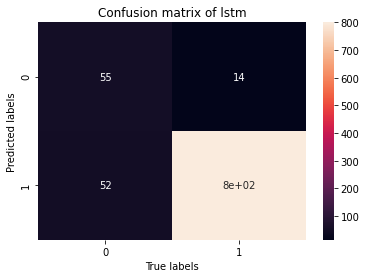

In [ ]:
model_eval('lstm', y_test, (pred_proba_lstm > 0.5).astype(int))

Performing  svc
The accuracy of the model is: 0.8675352877307275
The precision is: 0.9815303430079155
The recall: 0.8732394366197183
The F1 score: 0.9242236024844721


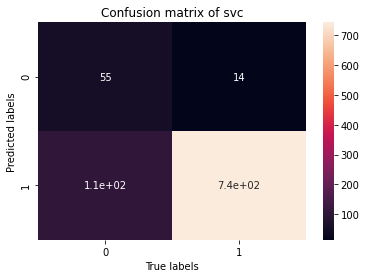

In [ ]:
model_eval('svc', y_test, pred_svc)

Performing  random forest
The accuracy of the model is: 0.9554831704668838
The precision is: 0.98562874251497
The recall: 0.965962441314554
The F1 score: 0.975696502667457


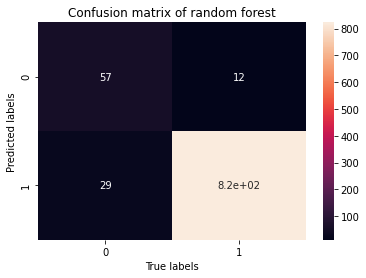

In [ ]:
model_eval('random forest', y_test, pred_rf)

Performing  logistic regression
The accuracy of the model is: 0.8914223669923995
The precision is: 0.9783715012722646
The recall: 0.9025821596244131
The F1 score: 0.938949938949939


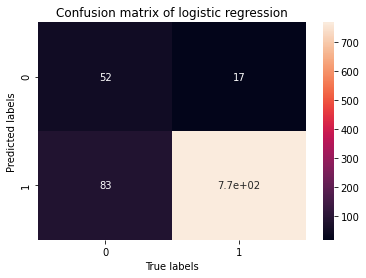

In [ ]:
model_eval('logistic regression', y_test, pred_lr)

The area under of lstm the curve is  0.9716098523508199 
The area under of logistic regression the curve is  0.9204599578145201 
The area under of random forest the curve is  0.9627985303123087 
The area under of support vector machines the curve is  0.9159522351500307 


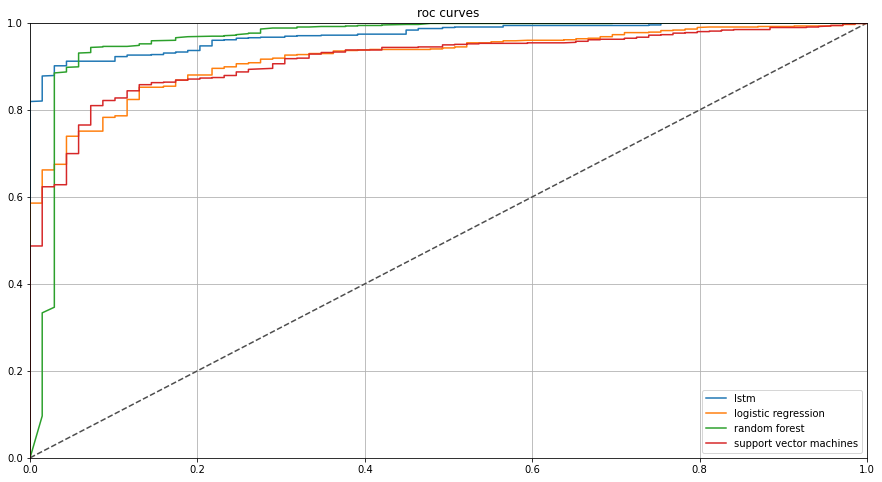

In [ ]:
    from sklearn.metrics import roc_curve, auc
    plt.figure(figsize=(15, 8))
    plt.plot([0,1],[0,1],ls="--", c=".3")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('roc curves')
    plt.grid(True)
    labels = ['lstm', 'logistic regression', 'random forest', 'support vector machines']
    for i, prediction_proba in enumerate([pred_proba_lstm, pred_proba_lr[:,1], pred_proba_rf[:,1], pred_proba_svc[:,1]]):
        fp, tp, seuil = roc_curve(y_test, prediction_proba)
        print("The area under of the {} roc curve is  {} ".format(labels[i], (auc(fp,tp))))
        plt.plot(fp,tp, label=labels[i])
    plt.legend()
    plt.show()


**QUANLITATIVE EVALUATION**

In [ ]:
test_corpus= ['I love it',
               'The best i have ever use',
               'I hate this product',
               'It absolutely change my life',
               'The product does not work very well']


test_corpus_df=pd.DataFrame({'test_review':test_corpus})
test_corpus_df

,test_review
0,I love it
1,The best i have ever use
2,I hate this product
3,It absolutely change my life
4,The product does not work very well


In [232]:
print('Evaluating lstm')
process_corpus = tokens_vectors(clean_corpus(test_corpus_df.test_review))

model_lstm.predict(process_corpus)

Evaluating lstm


array([[0.99998844],
       [0.99242574],
       [0.53131104],
       [0.99165034],
       [0.9688847 ]], dtype=float32)

In [ ]:
process_corpus_ml = tokens2vectors_ml(clean_corpus(test_corpus_df.test_review))


In [ ]:
print('Evaluating svc')

svc_clf.predict_proba(process_corpus_ml)[:, 1]

Evaluating svc


array([1.        , 0.99998665, 0.13746665, 0.9971132 , 0.74315175])

In [ ]:
print('Evaluating random forest')

rf_clf.predict_proba(process_corpus_ml)[:, 1]

Evaluating random forest


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished


array([1.        , 0.84333333, 0.64666667, 0.8       , 0.82666667])

In [ ]:
print('Evaluating logistic regression')

lr_clf.predict_proba(process_corpus_ml)[:, 1]


Evaluating logistic regression


array([0.99999904, 0.99827553, 0.0554923 , 0.99797918, 0.6916772 ])

In [231]:
test_df = pd.concat([test_corpus_df, 
                     pd.DataFrame(model_lstm.predict(process_corpus), columns=['lstm']),
                     pd.DataFrame(svc_clf.predict_proba(process_corpus_ml)[:, 1], columns=['svc']),
                     pd.DataFrame(rf_clf.predict_proba(process_corpus_ml)[:, 1], columns=['random forest']),
                     pd.DataFrame(lr_clf.predict_proba(process_corpus_ml)[:, 1], columns=['logistic regression'])], axis=1)

test_df

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished


,test_review,lstm,svc,random forest,logistic regression
0,I love it,0.999988,1.000000,1.000000,0.999999
1,The best i have ever use,0.992426,0.999987,0.843333,0.998276
2,I hate this product,0.531311,0.137467,0.646667,0.055492
3,It absolutely change my life,0.991650,0.997113,0.800000,0.997979
4,The product does not work very well,0.968885,0.743152,0.826667,0.691677
